# ĐỀ TÀI NCKH: KHAI PHÁ LUẬT KẾT HỢP TRONG DỮ LIỆU BÁN LẺ
## (Market Basket Analysis using Apriori & FP-Growth Algorithms)

---
### THÔNG TIN CHUNG
* **Sinh viên thực hiện:** Huỳnh Phúc Hưng
* **MSSV:** 3122411073
* **Lớp:** DCT122C3
* **GVHD:** ThS. Huỳnh Minh Trí
* **Học phần:** Nghiên cứu khoa học sinh viên

---
### TIẾN ĐỘ THỰC HIỆN

#### GIAI ĐOẠN 1: TỔNG QUAN & CHUẨN BỊ
* **1.1. Giới thiệu đề tài:** Mục tiêu và ý nghĩa thực tiễn.
* **1.2. Thiết lập môi trường:** Cài đặt thư viện (mlxtend, seaborn) và nạp dữ liệu.

#### GIAI ĐOẠN 2: TIỀN XỬ LÝ DỮ LIỆU
* **2.1. Đọc dữ liệu thô:** Tải dữ liệu từ Groceries Dataset.
* **2.2. Chuyển đổi định dạng:** Chuyển đổi dữ liệu sang dạng Transaction (Giỏ hàng).
* **2.3. Kiểm tra chất lượng:** Xác định số lượng giao dịch và danh mục sản phẩm.

#### GIAI ĐOẠN 3: PHÂN TÍCH DỮ LIỆU KHÁM PHÁ
* **3.1. Thống kê tần suất:** Xác định các mặt hàng phổ biến nhất (Best-sellers).
* **3.2. Trực quan hóa:** Biểu đồ phân bố tần suất mua hàng.

#### GIAI ĐOẠN 4: XÂY DỰNG MÔ HÌNH
* **4.1. Thuật toán Apriori:** Thiết lập tham số và sinh luật kết hợp.
* **4.2. Thuật toán FP-Growth:** Xây dựng cây FP-Tree và khai phá tập phổ biến.

#### GIAI ĐOẠN 5: ĐÁNH GIÁ & ĐỀ XUẤT
* **5.1. So sánh hiệu năng:** Đo thời gian chạy (Runtime) giữa Apriori và FP-Growth.
* **5.2. Ứng dụng thực tiễn:** Đề xuất chiến lược sắp xếp quầy kệ và khuyến mãi.

---

### GIAI ĐOẠN 1: TỔNG QUAN VÀ CHUẨN BỊ

In [ ]:
# Cài đặt thư viện mlxtend
!pip install mlxtend --upgrade

In [1]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

print("Đã cài đặt và import xong các thư viện!")

Đã cài đặt và import xong các thư viện!


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


### Trước khi bước vào làm, chúng ta phải làm rõ 3 khái niệm sau: Độ hỗ trợ, độ tin cậy, độ nâng.

Giả sử bạn có 100 hóa đơn siêu thị.

1. Độ hỗ trợ (Support): Độ phổ biến của món hàng.

Ví dụ: Có 10 hóa đơn mua Sữa. => Support(Sữa) = 10/100 = 10%.

Ý nghĩa: Loại bỏ các món quá ít người mua để đỡ tốn công tính toán.

2. Độ tin cậy (Confidence): Xác suất mua B khi đã mua A.

Ví dụ: Trong 10 người mua Sữa, có 7 người mua thêm Bánh mì. => Confidence(Sữa -> Bánh mì) = 7/10 = 70%.

Ý nghĩa: Thể hiện độ mạnh của luật kết hợp.

3. Độ nâng (Lift): (Quan trọng nhất) Đo lường sự ngẫu nhiên.

Lift = 1: Mua A và B chẳng liên quan gì nhau (ngẫu nhiên).

Lift > 1: Mua A thúc đẩy việc mua B (Đây là cái ta cần tìm).

Lift < 1: Mua A thì người ta né không mua B.

### GIAI ĐOẠN 2: TIỀN XỬ LÝ DỮ LIỆU

### 2.1. Đọc dữ liệu thô từ Groceries_dataset

In [2]:
import pandas as pd

# --- BƯỚC 2.1: ĐỌC DỮ LIỆU TỪ GITHUB (Tự động hóa) ---
# Link raw file từ GitHub
url = "https://raw.githubusercontent.com/PhucHungNanba/Scientific-research/refs/heads/main/Groceries_dataset.csv"

try:
    print(f"Đang tải dữ liệu từ GitHub: {url} ...")
    df = pd.read_csv(url)
    print(" Đã nạp dữ liệu thành công từ GitHub của PhucHungNanba!")
    print(f"   - Kích thước dữ liệu gốc: {df.shape}")

    print("\n--- Dữ liệu gốc (5 dòng đầu) ---")
    print(df.head())

except Exception as e:
    print(f" Lỗi: Không thể tải dữ liệu. Chi tiết lỗi: {e}")

# --- BƯỚC 2.2: TIỀN XỬ LÝ (Gom nhóm giỏ hàng) ---
# Chỉ chạy tiếp nếu df đã được tạo thành công
if 'df' in locals():
    # Gom nhóm: Một người (Member_number) đi chợ vào một ngày (Date) tính là 1 giỏ hàng
    # Chúng ta sẽ gom tất cả món hàng (itemDescription) của cùng 1 người trong 1 ngày lại thành 1 danh sách
    transactions_df = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index(name='items')

    print("\n--- Dữ liệu sau khi xử lý (Dạng Transaction/Giỏ hàng) ---")
    print(transactions_df.head())

    # Kiểm tra số lượng
    print(f"\n Tổng số giao dịch (giỏ hàng) tìm được: {len(transactions_df)}")

    # Lưu danh sách giỏ hàng vào biến 'dataset' để dùng cho thuật toán ở Giai đoạn 4
    dataset = transactions_df['items'].tolist()
    print(f"Ví dụ giỏ hàng đầu tiên: {dataset[0]}")

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Đang tải dữ liệu từ GitHub: https://raw.githubusercontent.com/PhucHungNanba/Scientific-research/refs/heads/main/Groceries_dataset.csv ...


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

 Đã nạp dữ liệu thành công từ GitHub của PhucHungNanba!
   - Kích thước dữ liệu gốc: (38765, 3)

--- Dữ liệu gốc (5 dòng đầu) ---
   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk

--- Dữ liệu sau khi xử lý (Dạng Transaction/Giỏ hàng) ---
   Member_number        Date  \
0           1000  15-03-2015   
1           1000  24-06-2014   
2           1000  24-07-2015   
3           1000  25-11-2015   
4           1000  27-05-2015   

                                               items  
0  [sausage, whole milk, semi-finished bread, yog...  
1                  [whole milk, pastry, salty snack]  
2                     [canned beer, misc. beverages]  
3                        [sausage, hygiene articles]  
4                         [soda, pickled vegetables]  

 Tổng

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

### 2.2. Chuyển đổi định dạng

In [3]:
# Gom nhóm: Một người (Member_number) di cho vào 1 ngày (Date) tính là 1 giỏ hàng
# Chúng ta sẽ gom tất cả món hàng (itemDescription) của cùng 1 người trong cùng 1 ngày thành cùng 1 danh sách
transactions_df = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index(name='items')

# Hiển thị kết quả sau khi gom nhóm
print("--- Du lieu sau khi chuyen doi sang dang Transaction ---")
print(transactions_df.head())

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

--- Du lieu sau khi chuyen doi sang dang Transaction ---
   Member_number        Date  \
0           1000  15-03-2015   
1           1000  24-06-2014   
2           1000  24-07-2015   
3           1000  25-11-2015   
4           1000  27-05-2015   

                                               items  
0  [sausage, whole milk, semi-finished bread, yog...  
1                  [whole milk, pastry, salty snack]  
2                     [canned beer, misc. beverages]  
3                        [sausage, hygiene articles]  
4                         [soda, pickled vegetables]  


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

### 2.3. Kiểm tra chất lượng

In [4]:
# Kiem tra tong so luong giao dich (gio hang)
total_transactions = len(transactions_df)
print(f"Tong so giao dich (gio hang) tim duoc: {total_transactions}")

# Luu danh sach gio hang vao bien 'dataset' de dung cho thuat toan o Giai doan 4
dataset = transactions_df['items'].tolist()

print(f"\nVi du gio hang dau tien: {dataset[0]}")
print(f"Vi du gio hang thu hai: {dataset[1]}")

Tong so giao dich (gio hang) tim duoc: 14963

Vi du gio hang dau tien: ['sausage', 'whole milk', 'semi-finished bread', 'yogurt']
Vi du gio hang thu hai: ['whole milk', 'pastry', 'salty snack']


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

## GIAI ĐOẠN 3: PHÂN TÍCH DỮ LIỆU KHÁM PHÁ

### 3.1. Thống kê tần suất

In [5]:
from collections import Counter
import pandas as pd

# 'dataset' đang là danh sách các giỏ hàng (list of lists) từ Giai đoạn 2
# Chúng ta cần 'trải phẳng' (flatten) nó ra thành một danh sách dài chứa tất cả món hàng để đếm
all_items = [item for transaction in dataset for item in transaction]
item_counts = Counter(all_items)

# Lấy ra Top 10 sản phẩm bán chạy nhất
top_n = 10
most_common_items = item_counts.most_common(top_n)

# Chuyển sang DataFrame để hiển thị dạng bảng
items_df = pd.DataFrame(most_common_items, columns=['Item', 'Frequency'])

print(f"--- Top {top_n} Sản phẩm bán chạy nhất ---")
print(items_df)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

--- Top 10 Sản phẩm bán chạy nhất ---
               Item  Frequency
0        whole milk       2502
1  other vegetables       1898
2        rolls/buns       1716
3              soda       1514
4            yogurt       1334
5   root vegetables       1071
6    tropical fruit       1032
7     bottled water        933
8           sausage        924
9      citrus fruit        812


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

### 3.2. Trực quan hóa

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

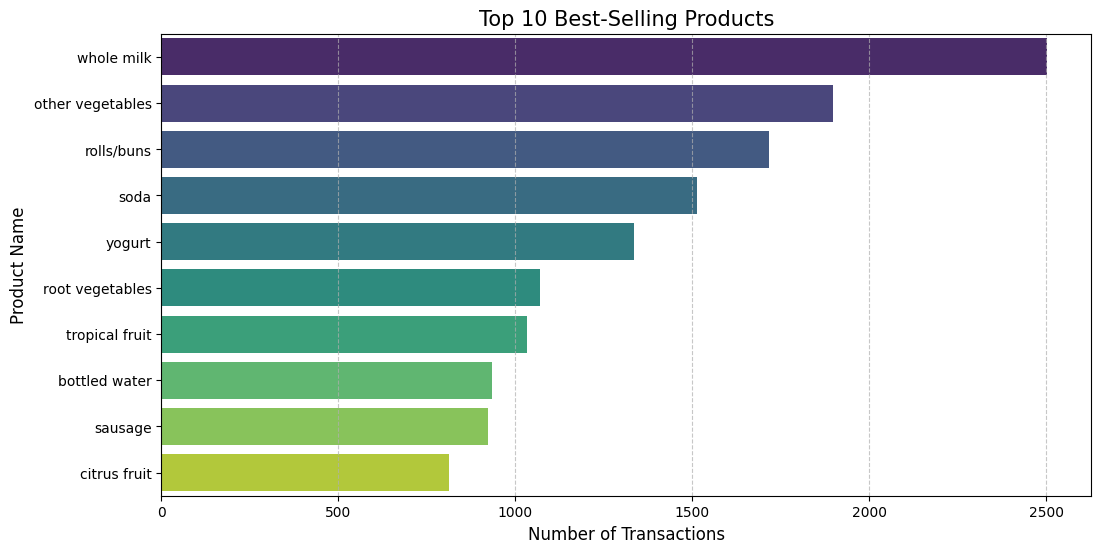

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập kích thước biểu đồ
plt.figure(figsize=(12, 6))

# Vẽ biểu đồ cột (Bar Chart) sử dụng Seaborn
sns.barplot(x='Frequency', y='Item', data=items_df, palette='viridis', hue='Item', legend=False)

# Thêm tiêu đề và nhãn
plt.title(f'Top {top_n} Best-Selling Products', fontsize=15)
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Product Name', fontsize=12)

# Thêm lưới mờ (grid) cho dễ nhìn
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.show()

## GIAI ĐOẠN 4: XÂY DỰNG MÔ HÌNH

### 4.0. Chuẩn bị dữ liệu cho mô hình

In [7]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# Khởi tạo công cụ mã hóa
te = TransactionEncoder()

# Biến đổi danh sách giỏ hàng (dataset) thành mảng True/False
te_ary = te.fit(dataset).transform(dataset)

# Chuyển thành DataFrame để thuật toán có thể đọc được
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

print("--- Dữ liệu đã được mã hóa (Sẵn sàng cho thuật toán) ---")
print(df_encoded.head())
print(f"\nKích thước ma trận: {df_encoded.shape}")

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

--- Dữ liệu đã được mã hóa (Sẵn sàng cho thuật toán) ---
   Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                  False     False             False             False   
1                  False     False             False             False   
2                  False     False             False             False   
3                  False     False             False             False   
4                  False     False             False             False   

   baby cosmetics   bags  baking powder  bathroom cleaner   beef  berries  \
0           False  False          False             False  False    False   
1           False  False          False             False  False    False   
2           False  False          False             False  False    False   
3           False  False          False             False  False    False   
4           False  False          False             False  False    False   

   ...  turkey  vinegar  waffles  w

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


### 4.1. Thuật toán Apriori

In [8]:
from mlxtend.frequent_patterns import apriori, association_rules
import time

# --- CHẠY THUẬT TOÁN APRIORI (Điều chỉnh min_support) ---
print("Đang chạy thuật toán Apriori với min_support=0.001...")
start_time = time.time()

# Hạ min_support xuống 0.001 để bắt được nhiều luật hơn
frequent_itemsets_ap = apriori(df_encoded, min_support=0.001, use_colnames=True)

end_time = time.time()
apriori_time = end_time - start_time

print(f"Đã xong! Thời gian chạy Apriori: {apriori_time:.4f} giây")
print(f"Tìm thấy {len(frequent_itemsets_ap)} tập phổ biến.")

# --- SINH LUẬT KẾT HỢP ---
# Lấy các luật có Lift >= 1 (có mối liên hệ tích cực)
# Hạ confidence xuống 0.05 (5%) để không bỏ sót
rules_ap = association_rules(frequent_itemsets_ap, metric="lift", min_threshold=1.0)
rules_ap = rules_ap[rules_ap['confidence'] >= 0.05]

print(f"Tổng số luật tìm được: {len(rules_ap)}")

# Sắp xếp theo độ tin cậy (confidence) giảm dần
print("\n--- Top 5 Luật kết hợp mạnh nhất ---")
print(rules_ap.sort_values(by='confidence', ascending=False).head(5)[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Đang chạy thuật toán Apriori với min_support=0.001...


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Đã xong! Thời gian chạy Apriori: 3.1370 giây
Tìm thấy 750 tập phổ biến.
Tổng số luật tìm được: 94

--- Top 5 Luật kết hợp mạnh nhất ---
               antecedents   consequents   support  confidence      lift
235      (yogurt, sausage)  (whole milk)  0.001470    0.255814  1.619866
217  (rolls/buns, sausage)  (whole milk)  0.001136    0.212500  1.345594
229        (soda, sausage)  (whole milk)  0.001069    0.179775  1.138374
202  (semi-finished bread)  (whole milk)  0.001671    0.176056  1.114825
222   (rolls/buns, yogurt)  (whole milk)  0.001337    0.170940  1.082428


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

### 4.2. Thuật toán FP-Growth

In [9]:
from mlxtend.frequent_patterns import fpgrowth

# Đo thời gian bắt đầu
start_time = time.time()

# --- CHẠY THUẬT TOÁN FP-GROWTH ---
frequent_itemsets_fp = fpgrowth(df_encoded, min_support=0.01, use_colnames=True)

# Đo thời gian kết thúc
end_time = time.time()
fpgrowth_time = end_time - start_time

print(f"Thời gian chạy FP-Growth: {fpgrowth_time:.4f} giây")
print(f"Tìm thấy {len(frequent_itemsets_fp)} tập phổ biến.")

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Thời gian chạy FP-Growth: 0.3986 giây
Tìm thấy 69 tập phổ biến.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

## GIAI ĐOẠN 5: ĐÁNH GIÁ & ĐỀ XUẤT

### 5.1. So sánh hiệu năng

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

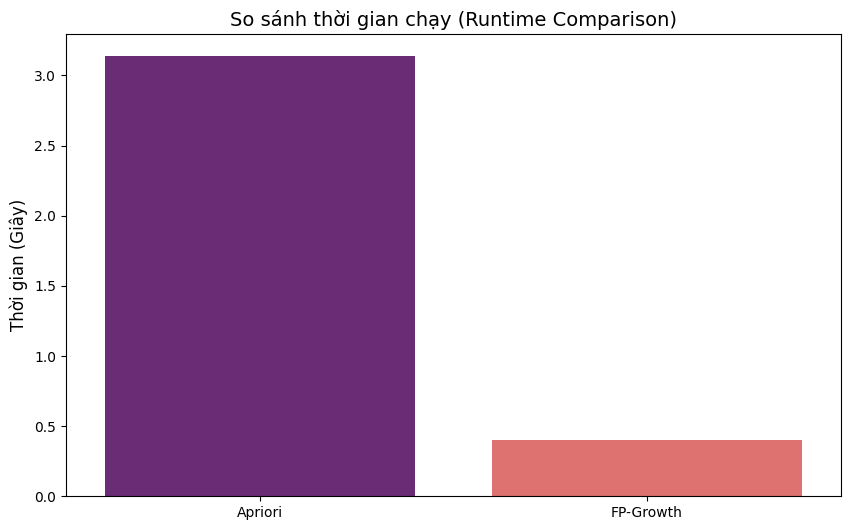

 Thời gian Apriori: 3.1370 giây
 Thời gian FP-Growth: 0.3986 giây
 KẾT LUẬN: Thuật toán FP-Growth nhanh hơn gấp 7.87 lần so với Apriori!


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo dữ liệu để vẽ
algorithms = ['Apriori', 'FP-Growth']
times = [apriori_time, fpgrowth_time]

# Vẽ biểu đồ so sánh
plt.figure(figsize=(10, 6))
sns.barplot(x=algorithms, y=times, palette='magma', hue=algorithms, legend=False)
plt.title('So sánh thời gian chạy (Runtime Comparison)', fontsize=14)
plt.ylabel('Thời gian (Giây)', fontsize=12)
plt.show()

# In kết luận bằng số liệu
print(f" Thời gian Apriori: {apriori_time:.4f} giây")
print(f" Thời gian FP-Growth: {fpgrowth_time:.4f} giây")

if apriori_time > fpgrowth_time:
    speedup = apriori_time / fpgrowth_time
    print(f" KẾT LUẬN: Thuật toán FP-Growth nhanh hơn gấp {speedup:.2f} lần so với Apriori!")
else:
    print("Hai thuật toán có tốc độ tương đương (do dữ liệu nhỏ).")

### 5.2. Đề xuất ứng dụng thực tiễn

In [11]:
import warnings
# Tắt các cảnh báo đỏ gây rối mắt
warnings.filterwarnings('ignore')

# --- ĐIỀU CHỈNH CHIẾN LƯỢC LỌC (Relaxing Constraints) ---
# Thử nới lỏng điều kiện:
# 1. Lift >= 1.0: Chỉ cần có mối liên hệ tích cực (tốt hơn ngẫu nhiên) là lấy.
# 2. Confidence: Bỏ qua lọc confidence để xem ta có bao nhiêu luật tất cả.

strong_rules = rules_ap[rules_ap['lift'] >= 1.0]

print(f"--- THỐNG KÊ LUẬT KẾT HỢP ---")
print(f"Tổng số luật tìm được (Lift >= 1): {len(strong_rules)}")
print(f"Lift cao nhất: {strong_rules['lift'].max():.4f}")
print(f"Confidence cao nhất: {strong_rules['confidence'].max():.4f}")

# Sắp xếp theo độ mạnh (Lift) giảm dần để lấy Top 10
top_rules = strong_rules.sort_values(by='lift', ascending=False).head(10)

print("\n--- GỢI Ý CHIẾN LƯỢC KINH DOANH (Đã điều chỉnh) ---")
if len(top_rules) > 0:
    for i, row in top_rules.iterrows():
        # Lấy tên sản phẩm
        item_A = list(row['antecedents'])[0]
        item_B = list(row['consequents'])[0]
        lift = row['lift']
        conf = row['confidence']
        support = row['support']

        print(f" NẾU khách mua '{item_A}' -> THÌ họ có xu hướng mua '{item_B}'")
        print(f"    Độ mạnh (Lift): {lift:.2f} | Độ tin cậy (Conf): {conf:.1%} | Độ phổ biến: {support:.1%}")
        print("-" * 60)
else:
    print("Vẫn chưa tìm thấy luật nào. Hãy thử giảm min_support ở bước 4.1 xuống thấp hơn (ví dụ: 0.001).")

--- THỐNG KÊ LUẬT KẾT HỢP ---
Tổng số luật tìm được (Lift >= 1): 94
Lift cao nhất: 2.1829
Confidence cao nhất: 0.2558

--- GỢI Ý CHIẾN LƯỢC KINH DOANH (Đã điều chỉnh) ---
 NẾU khách mua 'yogurt' -> THÌ họ có xu hướng mua 'sausage'
    Độ mạnh (Lift): 2.18 | Độ tin cậy (Conf): 13.2% | Độ phổ biến: 0.1%
------------------------------------------------------------
 NẾU khách mua 'whole milk' -> THÌ họ có xu hướng mua 'yogurt'
    Độ mạnh (Lift): 1.91 | Độ tin cậy (Conf): 16.4% | Độ phổ biến: 0.1%
------------------------------------------------------------
 NẾU khách mua 'specialty chocolate' -> THÌ họ có xu hướng mua 'citrus fruit'
    Độ mạnh (Lift): 1.65 | Độ tin cậy (Conf): 8.8% | Độ phổ biến: 0.1%
------------------------------------------------------------
 NẾU khách mua 'yogurt' -> THÌ họ có xu hướng mua 'whole milk'
    Độ mạnh (Lift): 1.62 | Độ tin cậy (Conf): 25.6% | Độ phổ biến: 0.1%
------------------------------------------------------------
 NẾU khách mua 'flour' -> THÌ họ c

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag